In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/Drowsines")

In [3]:
!pwd

/content/drive/MyDrive/Drowsines


In [4]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git  # clone repo

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
%cd yolov5

/content/drive/MyDrive/Drowsines/yolov5


In [6]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [7]:
from IPython.display import Image, clear_output  # to display images

In [8]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [9]:
%cd ..

/content/drive/MyDrive/Drowsines


In [13]:
import gdown

url = (
    "https://drive.google.com/file/d/1fcL73Q1SLBsPY4dAX0aIdwrMgGD0ZYGQ/view?usp=sharing"
)

file_id = url.split("/")[5]
print(file_id)

prefix = "https://drive.google.com/uc?/export=download&id="
gdown.download(prefix + file_id)

print("Data Download!")

1fcL73Q1SLBsPY4dAX0aIdwrMgGD0ZYGQ


Downloading...
From: https://drive.google.com/uc?/export=download&id=1fcL73Q1SLBsPY4dAX0aIdwrMgGD0ZYGQ
To: /content/drive/MyDrive/Drowsines/data.zip
100%|██████████| 17.6M/17.6M [00:00<00:00, 39.2MB/s]

Data Download!


In [16]:
!unzip data.zip

Archive:  data.zip
   creating: test/images/
  inflating: test/images/GOPR0492_MP4-100_jpg.rf.b8becff32c2326c70edb8d719f0239cb.jpg  
  inflating: test/images/GOPR0492_MP4-109_jpg.rf.d5dc228e2758dbf1905b1885faedcb88.jpg  
  inflating: test/images/GOPR0492_MP4-117_jpg.rf.0db739d10912e81f52f6c7f2454b1276.jpg  
  inflating: test/images/GOPR0492_MP4-121_jpg.rf.cab81895fd844e5a742213209ce53a29.jpg  
  inflating: test/images/GOPR0492_MP4-126_jpg.rf.f31e7d36af507bb7f9b2980de25378ec.jpg  
  inflating: test/images/GOPR0492_MP4-129_jpg.rf.4ab62a8bfe44d47dd8d0fb675fe95ae6.jpg  
  inflating: test/images/GOPR0492_MP4-159_jpg.rf.a7cb7a5e09ff2574e64300deed41b149.jpg  
  inflating: test/images/GOPR0492_MP4-160_jpg.rf.c8724cb80d046dc3fda376fb9fc1c81b.jpg  
  inflating: test/images/GOPR0492_MP4-170_jpg.rf.690eca3e84491dccbc9b0c50becab758.jpg  
  inflating: test/images/GOPR0492_MP4-176_jpg.rf.2c9f4de9feb22780e4a1645b796a6b87.jpg  
  inflating: test/images/GOPR0492_MP4-182_jpg.rf.ab2e66da70d03b8d3f5783c5e4

In [17]:
%cat data.yaml

train: ../train/images
val: ../test/images

nc: 2
names: ['awake', 'drowsy']

## Define Model Configuration and Architecture

we will write a yaml script that defines the parameters for our model like the number of classes, and each layer.

You do not need to edit these cells, buy you may.

In [18]:
#define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [19]:
num_classes

'2'

In [20]:
#this is the model configuration we will use
%cat yolov5/models/yolov5m.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [21]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [23]:
%%writetemplate yolov5/models/custom_yolov5m.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [24]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd yolov5/
!python train.py --img 416 --batch 16 --epochs 500 --data '../data.yaml' --cfg ./models/custom_yolov5m.yaml --weights 'yolov5m.pt' --name yolov5m_results  --cache

/content/drive/MyDrive/Drowsines/yolov5
train: weights=yolov5m.pt, cfg=./models/custom_yolov5m.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_p

In [25]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

In [26]:
%reload_ext tensorboard

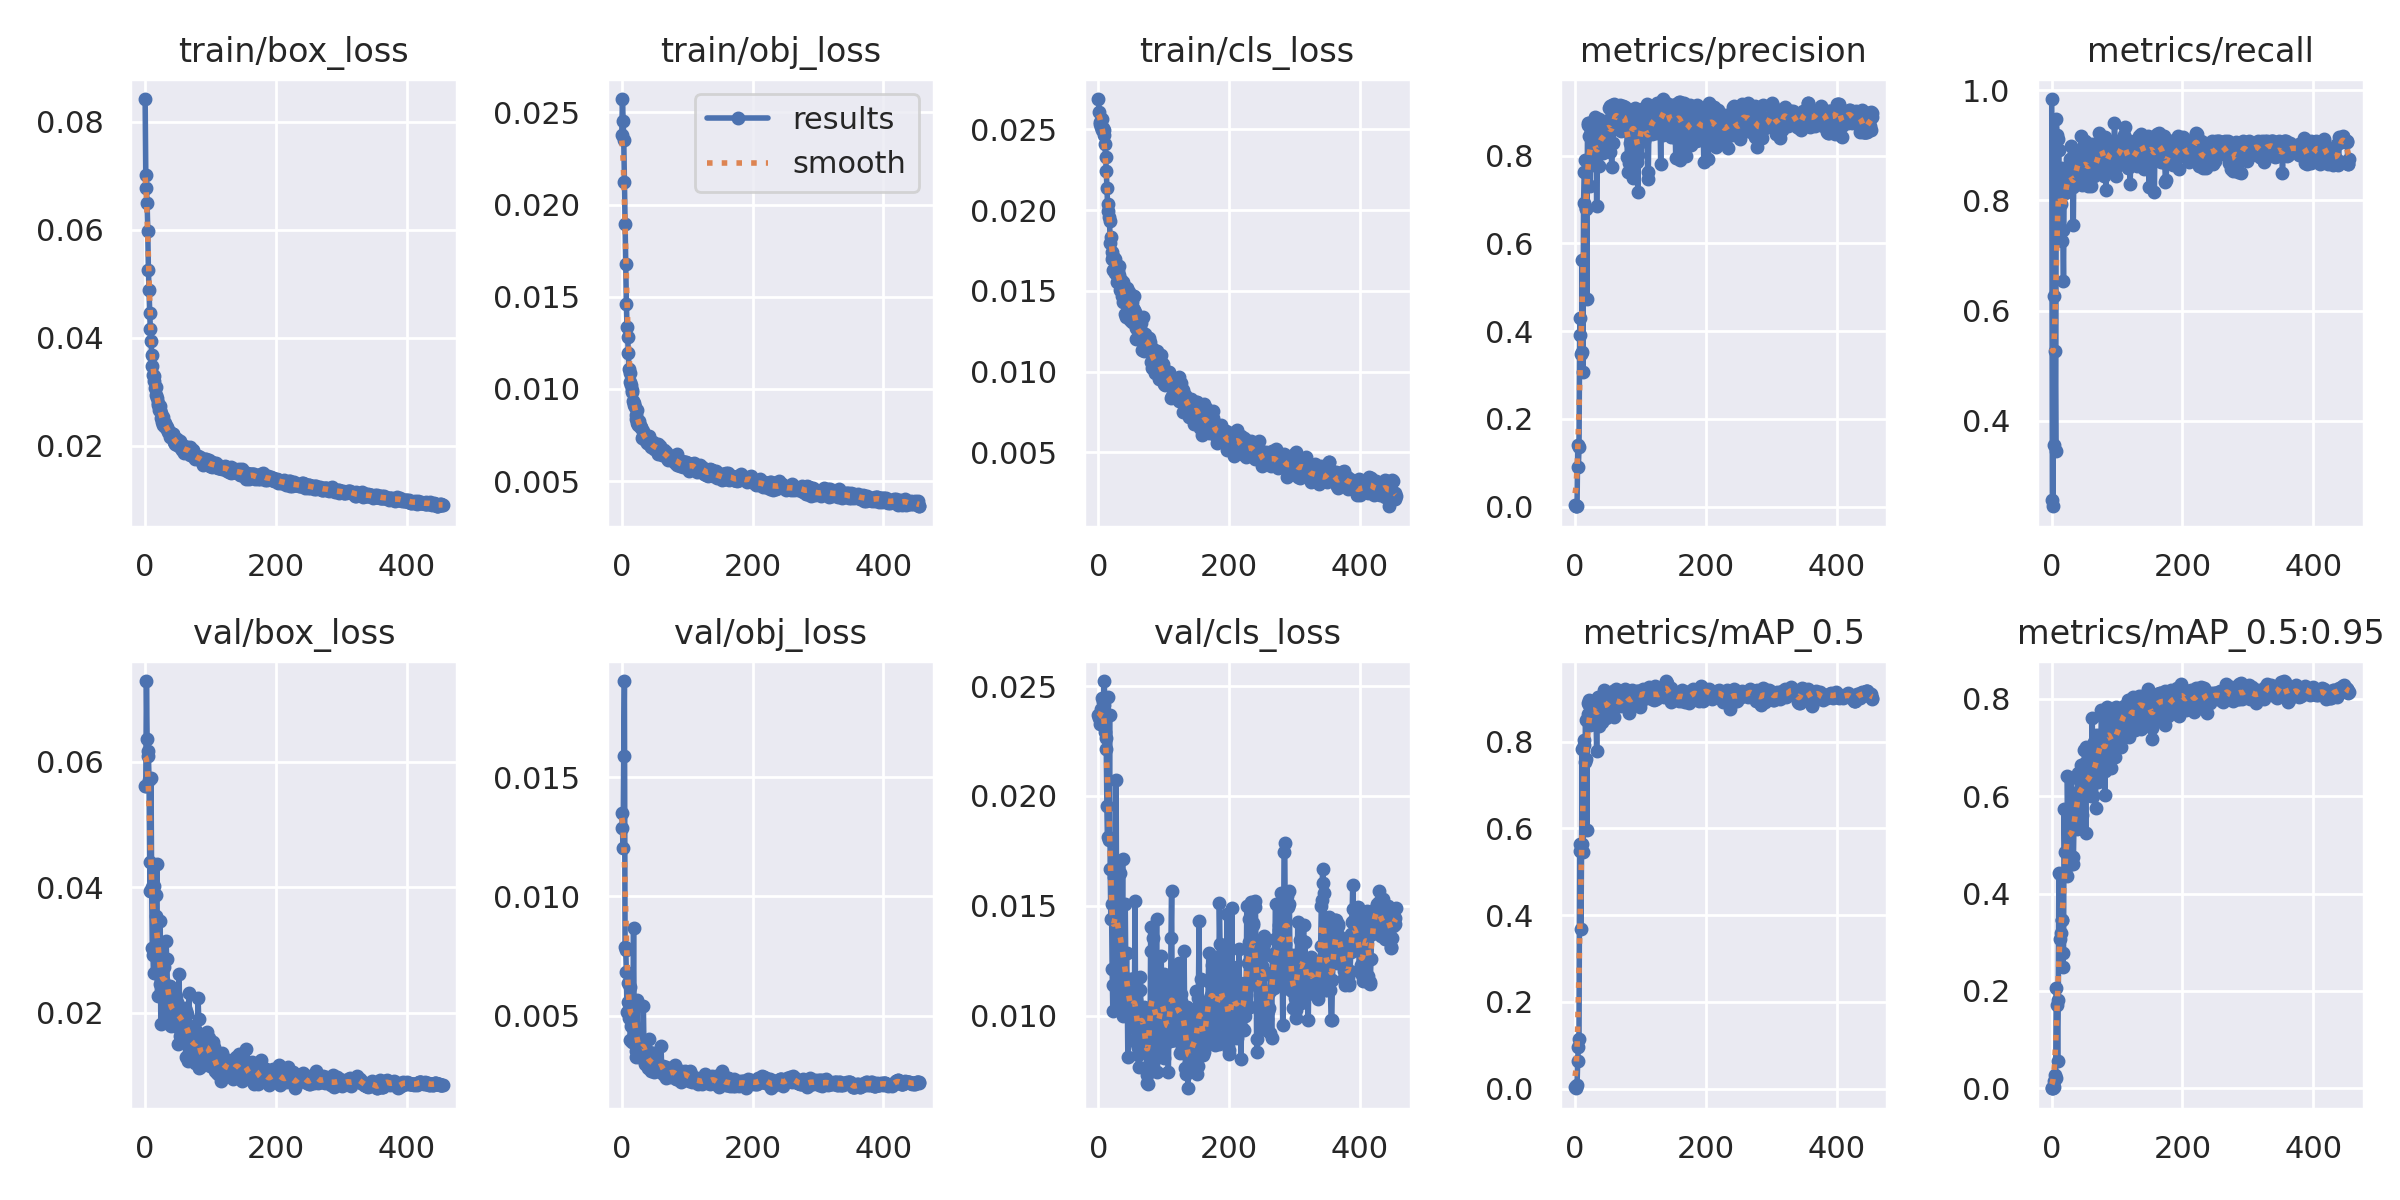

In [28]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='runs/train/yolov5m_results/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


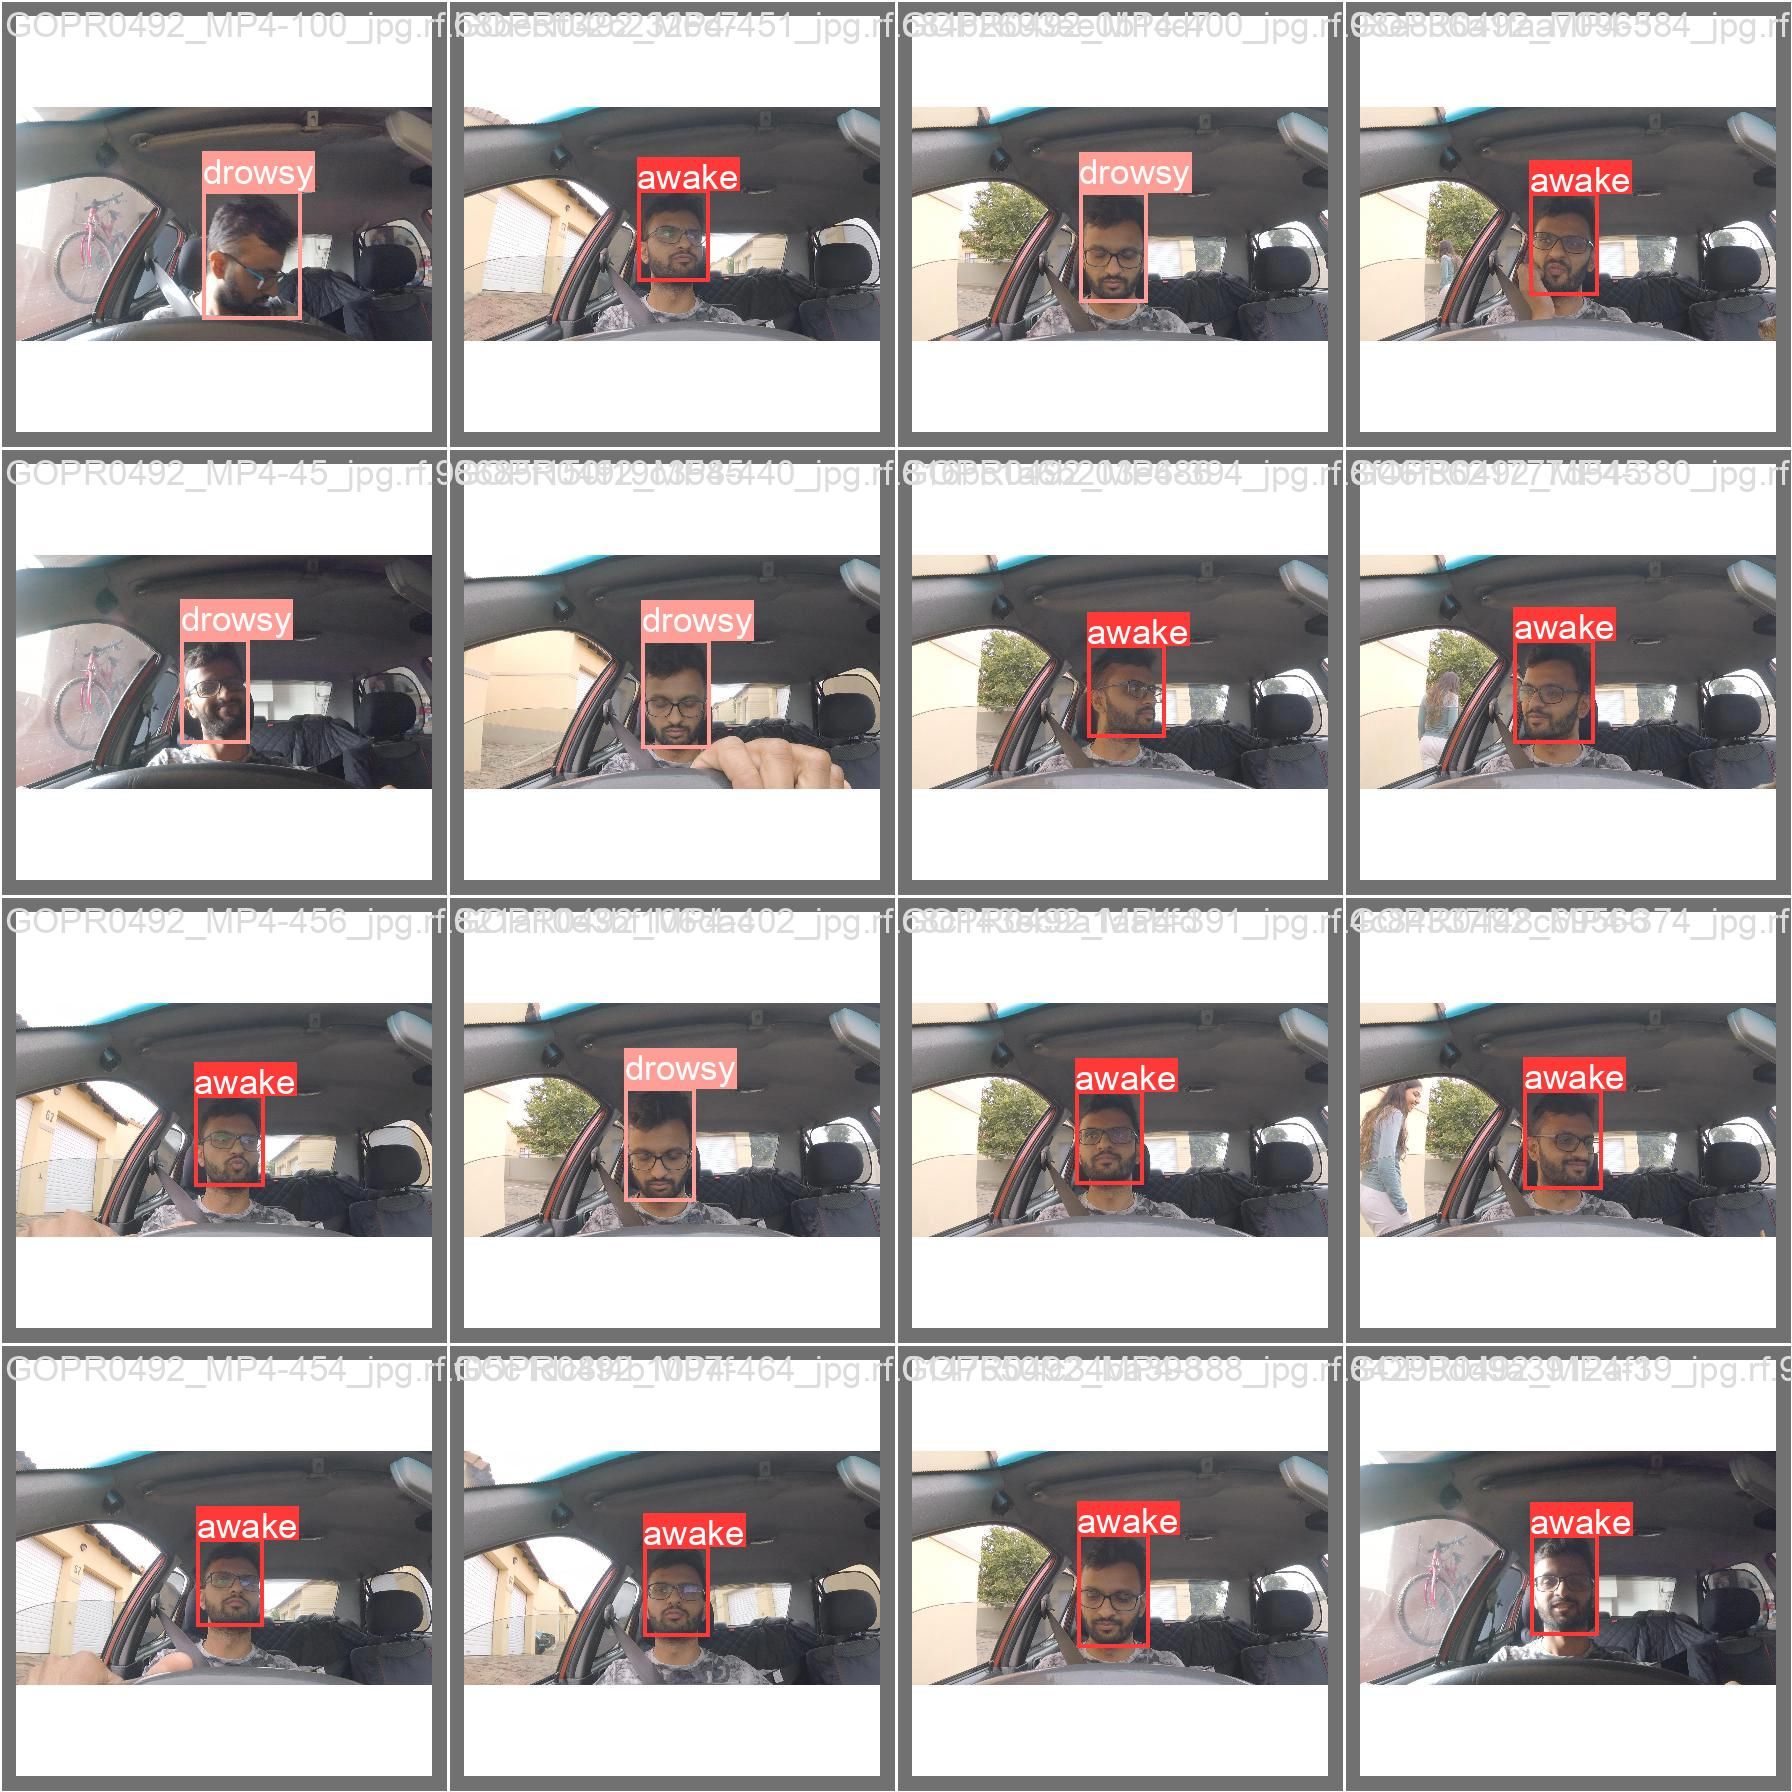

In [31]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/yolov5m_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


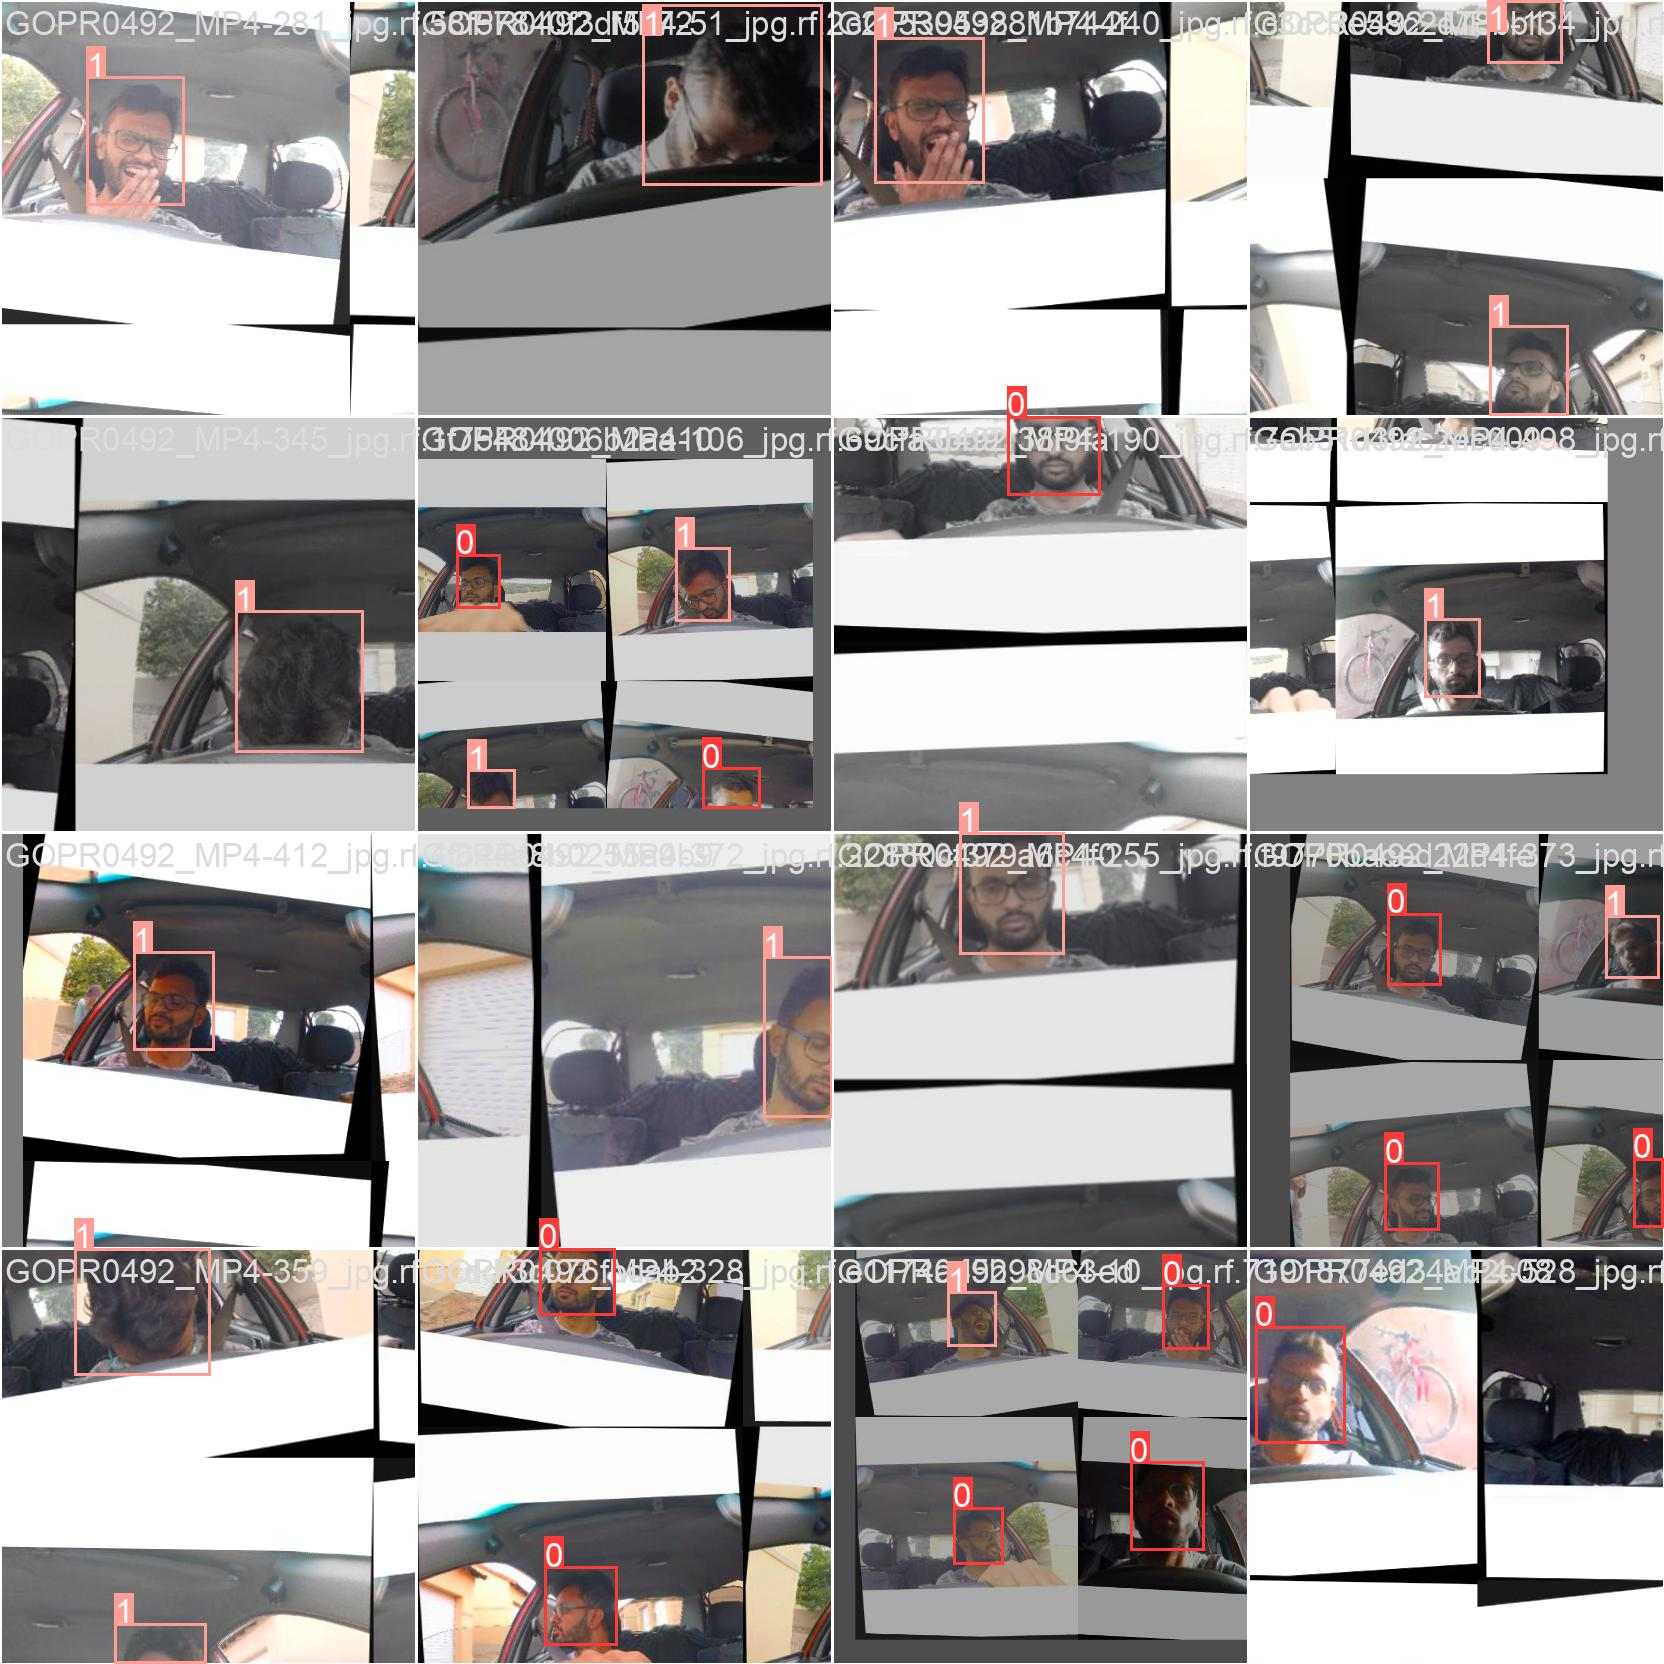

In [32]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='runs/train/yolov5m_results/train_batch0.jpg', width=900)

In [33]:
%ls runs/train/yolov5m_results/weights

best.pt  last.pt


In [35]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
!python detect.py --weights runs/train/yolov5m_results/weights/best.pt --img 416 --conf 0.5 --source ../test/images

detect: weights=['runs/train/yolov5m_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5m summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/71 /content/drive/MyDrive/Drowsines/test/images/GOPR0492_MP4-100_jpg.rf.b8becff32c2326c70edb8d719f0239cb.jpg: 416x416 1 drowsy, 7.6ms
image 2/71 /content/drive/MyDrive/Drowsines/test/images/GOPR0492_MP4-109_jpg.rf.d5dc228e2758dbf1905b1885faedcb88.jpg: 416x416 1 awake, 8.1ms
image 3/71 /content/drive/MyDriv

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('yolov5/runs/detect/exp*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [37]:
%cp runs/train/yolov5m_results/weights/best.pt "/content/drive/MyDrive/Drowsines/model"